# USGS Gage Explorer


#### [National Water Information System: Help System](https://help.waterdata.usgs.gov/) 

In [1]:
#--Import Python Libraries
get_ipython().magic('matplotlib notebook')
import pandas as pd
import numpy as np
from DataGrabber import *

## Identify Available Gages

In [2]:
#--Enter State Code
state = 'ny'

#---------RUN----------#
gage_list = GotoUSGS(state)
print("\nCLICK HERE FOR USGS GAGES: \n", gage_list)
print("\nCLICK HERE FOR MAP: \n", 'https://maps.waterdata.usgs.gov/mapper/index.html')


CLICK HERE FOR USGS GAGES: 
 https://waterdata.usgs.gov/nwis/uv?referred_module=sw&state_cd=ny&site_tp_cd=OC&site_tp_cd=OC-CO&site_tp_cd=ES&site_tp_cd=LK&site_tp_cd=ST&site_tp_cd=ST-CA&site_tp_cd=ST-DCH&site_tp_cd=ST-TS&format=station_list

CLICK HERE FOR MAP: 
 https://maps.waterdata.usgs.gov/mapper/index.html


##### Copy Gage ID's From USGS Webpage

In [3]:
#--Enter Selected Gages
Conklin    = '01503000' # will be df1
Vestal     = '01513500' # will be df2
Binghamton = '01503500' # will be df3

#--Assign Gage to df_name for reference (which wil be created in the denxt few steps)
df1_name = 'Conklin'
df2_name = 'Vestal'
df3_name = 'Binghamton'


Retrieved Data for USGS Gage:  01503000

 SUSQUEHANNA RIVER AT CONKLIN NY


<IPython.core.display.Javascript object>


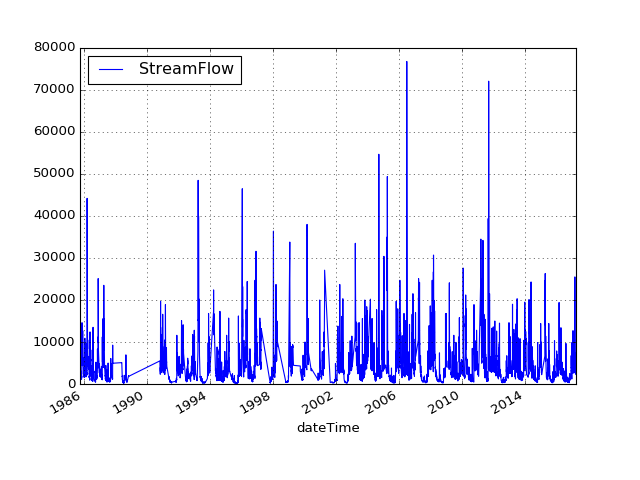

In [4]:
#--Grab Flow Table
try:
    df1_q = Get_USGS_Instant(eval(df1_name), flow, start, stop)
    df1_q.plot(grid = True)
except:
    print('No Flow Data Available')



Retrieved Data for USGS Gage:  01503000

 SUSQUEHANNA RIVER AT CONKLIN NY


<IPython.core.display.Javascript object>


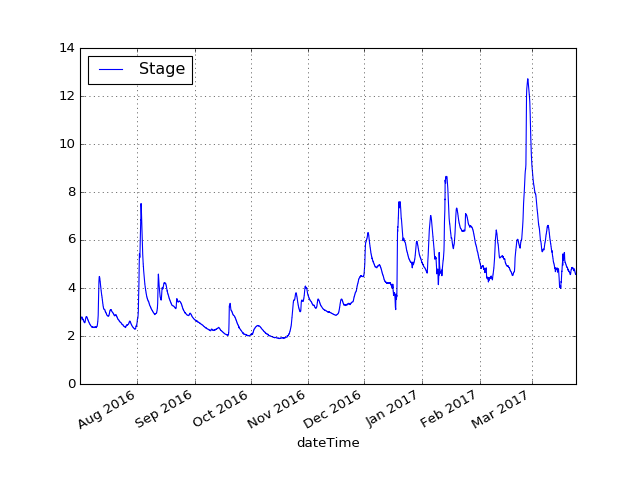

In [5]:
#--Grab Stage Table
try:
    df1_s = Get_USGS_Instant(eval(df1_name), stage, start, stop)
    df1_s.plot(grid = True)
except:
    print('No Stage Data Available')



Retrieved Data for USGS Gage:  01513500

 SUSQUEHANNA RIVER AT VESTAL NY


<IPython.core.display.Javascript object>


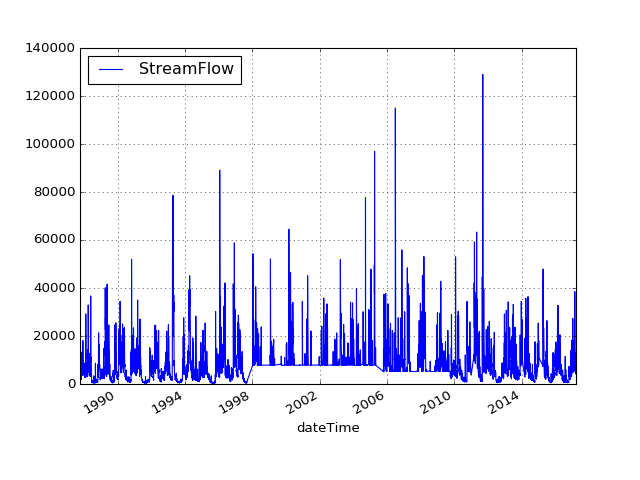

In [6]:
#--Grab Flow Table
try:
    df2_q = Get_USGS_Instant(eval(df2_name), flow, start, stop)
    df2_q.plot(grid = True)
except:
    print('No Flow Data Available')

In [7]:
#--Grab Stage Table
try:
    df2_s = Get_USGS(eval(df2_name), stage, start, stop)
    df2_s.plot(grid = True)
except:
    print('No Stage Data Available')

No Stage Data Available


### Take a Closer look at the storm in March

Vestal
Conklin


<IPython.core.display.Javascript object>


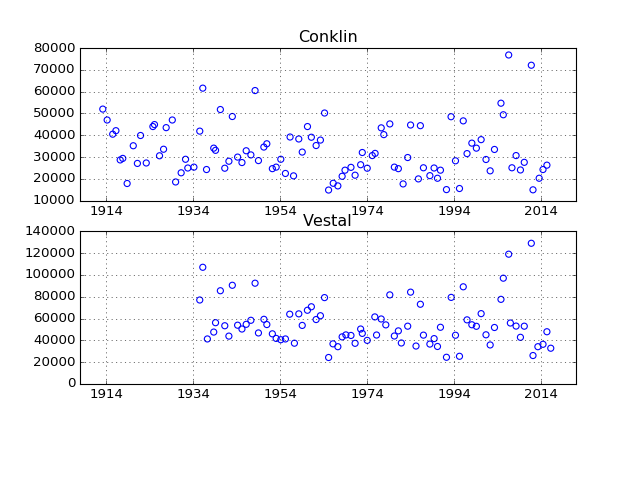

In [8]:
storm_start, storm_end = '2017-02-18 06:45:00', '2017-03-10 06:45:00'
print(df2_name)
#fig = StageFlowPlotter(df2_q, df2_s, storm_start, storm_end)
print(df1_name)
fig = StageFlowPlotter(df1_q,df1_s, storm_start, storm_end)


## Now lets look at the Peak Flows

In [9]:
#--Get Peak Flows for Gages of interest
df1_p = Get_Peaks(eval(df1_name))
df2_p = Get_Peaks(eval(df2_name))

In [10]:
#--Plot Peaks for df1 & df2

ax1 = plt.subplot(211)
plt.scatter(df1_p.index , df1_p, color = 'b', marker = 'o', facecolors='none', s=30)
plt.title(df1_name)
plt.grid()

ax2 = plt.subplot(212, sharex=ax1)
plt.scatter(df2_p.index , df2_p, color = 'b', marker = 'o', facecolors='none', s=30)
plt.title(df2_name)
plt.grid()

###  Find Current 100yr Flow using PeakFlow

In [11]:
#--Download PeakFQ data
GetPKFQ(eval(df1_name))
GetPKFQ(eval(df2_name))

#--Stats:
#skew_table = 'https://ny.water.usgs.gov/pubs/wri/wri004022/WRIR00-4022.pdf'
#print(skew_table)

01503000 Data Saved in return_periods
01513500 Data Saved in return_periods


In [12]:
df1_100yr = 72760. 
df2_100yr = 121000.

#### To Do: 

    3. Bring in HEC-RAS Return Periods
    4. Add stretching for return period analysis
    5. Add interpolating to compate daily vs instantaneous 
    6. Add wier flow converter and hydrogaph builder